In [6]:
#Загрузим необходимые библиотеки
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [3]:
insclass = pd.read_csv(r"insclass_train.csv").fillna(0)
insclass.head()

Y = insclass['target']
x = insclass.drop('target', axis = 1)

x = pd.concat([x, pd.get_dummies(x['variable_1'], drop_first=True),
               pd.get_dummies(x['variable_5'], drop_first=True),
               pd.get_dummies(x['variable_20'], drop_first=True),
               pd.get_dummies(x['variable_21'], drop_first=True),
               pd.get_dummies(x['variable_22'], drop_first=True),
               pd.get_dummies(x['variable_28'], drop_first=True)], axis = 1)

x = x.drop(['variable_1', 'variable_5', 'variable_20', 'variable_21', 'variable_22', 'variable_28'], axis = 1)

x

# Y = insclass['jp_sales']

# x = insclass.drop('jp_sales', axis=1)

,variable_2,variable_3,variable_4,variable_6,variable_7,variable_8,variable_9,variable_10,variable_11,variable_12,...,h993,h994,h995,h996,h998,h999,t2,t3,t4,t5
0,0,0,14,98.0,0.0,0.0,0.0,0,0,166.266987,...,False,False,False,False,False,False,False,False,False,False
1,0,0,7,106.0,0.0,0.0,0.0,0,0,80.338555,...,False,False,False,False,False,False,False,False,False,False
2,0,0,4,123.0,0.0,0.0,0.0,0,0,38.519899,...,False,False,False,False,False,False,False,False,False,False
3,0,0,9,102.0,0.0,0.0,0.0,0,0,109.845800,...,False,False,False,False,False,False,False,False,False,False
4,0,0,18,117.0,0.0,0.0,0.0,0,0,224.168209,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151401,0,0,3,123.0,0.0,0.0,0.0,0,0,13.635261,...,False,False,False,False,False,False,False,False,False,False
151402,0,0,6,123.0,1591.0,0.0,150000.0,0,0,68.071719,...,False,False,False,False,False,False,False,False,False,False
151403,0,0,7,158.0,1998.0,0.0,0.0,0,0,76.689904,...,False,False,False,False,False,False,False,False,False,False
151404,0,0,3,82.0,0.0,0.0,0.0,0,0,0.000000,...,False,False,False,False,False,False,False,False,False,False


In [4]:
x.dtypes

variable_2      int64
variable_3      int64
variable_4      int64
variable_6    float64
variable_7    float64
               ...   
h999             bool
t2               bool
t3               bool
t4               bool
t5               bool
Length: 1746, dtype: object

In [9]:
x_train, x_test, Y_train, Y_test = train_test_split(x, Y, test_size=0.3, random_state=42)

In [2]:
#Исходные данные: x - расходы на рекламу, Y - объемы продаж
x = pd.DataFrame(np.array([39, 36, 60, 21, 27, 12, 51, 57, 54, 42, 18, 9, 48, 66, 6, 30, 24, 33, 15, 21]))
Y = pd.DataFrame(np.array([1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0]))
display(x, Y)


,0
0,39
1,36
2,60
3,21
4,27
5,12
6,51
7,57
8,54
9,42


,0
0,1
1,0
2,1
3,1
4,1
5,0
6,1
7,1
8,1
9,0


Реализовать класс модели логистической регрессии с использованием:
а) максимизации логарифмического правдоподобия методом градиентного подъема
б) минимизации функции потерь (кросс-энтропии) методом градиентного спуска

Сравнить результаты (время исполнения и достигнутые значения accuracy и f1) в случаях а и б при одном и том же числе шагов и скорости обучения.



In [5]:
#Реализуем цикл градиентного спуска
class LogisticRegressionGD(object):
    def __init__(self):
        self.a = np.zeros(2).reshape(1, 2)
    def sigmoid(self, x):
        return 1/(1 + np.exp(-x @ self.a))
    def predict(self, x):
        return self.sigmoid(x)
    def coefs(self):
        return self.a
    def LogLikelihood(self, x, Y):
        return 0
    def CrossEntropy(self, x, Y):
        return (-Y*np.log(self.predict(x)) - (1- Y)*np.log(1 - self.predict(x))).sum()

    def accuracy(self, y_test, y_pred):
        correct = 0
        for i in range(len(y_test)):
            if y_test[i][-1] == y_pred[i]:
                correct += 1
        return correct / len(y_test)
    
    def fit(self, x, Y, alpha = 0.001, epsylon = 0.01, max_steps = 5000, Rtype = "LL"):
        self.a = np.zeros (x.shape[1]).reshape(x.shape[1],1)
        steps, errors = [], []
        step = 0
        for _ in range(max_steps):
            if Rtype == "LL":
                new_error = self.LogLikelihood(x, Y)
                dT_a = 0
                self.a += alpha*dT_a
            elif Rtype == "CE":
                new_error = self.CrossEntropy(x, Y)
                #display(new_error)
                dT_a = -x.T @(Y - self.predict(x))
                self.a -= alpha*dT_a
            step += 1
            steps.append(step)
            errors.append(new_error)
            #if new_error < epsylon:
            #    break
        return steps, errors

In [4]:
x_ = x.copy()
import time

intercept = np.ones((x.shape[0], 1))
x_ = pd.DataFrame(np.concatenate((intercept, x), axis = 1))


In [7]:
start_time = time.time()
regr = LogisticRegressionGD()
steps, errors =  regr.fit(x_, Y, alpha = 0.01, epsylon = 0.01, max_steps = 20000, Rtype = "CE") 

display('Время обучения: ', time.time() - start_time, 'сек.')

e:\Programs\SII_labs\.venv\Lib\site-packages\pandas\core\internals\blocks.py:366: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)
e:\Programs\SII_labs\.venv\Lib\site-packages\pandas\core\internals\blocks.py:366: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)
e:\Programs\SII_labs\.venv\Lib\site-packages\pandas\core\internals\blocks.py:366: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)
e:\Programs\SII_labs\.venv\Lib\site-packages\pandas\core\internals\blocks.py:366: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)
e:\Programs\SII_labs\.venv\Lib\site-packages\pandas\core\internals\blocks.py:366: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)
e:\Programs\SII_labs\.venv\Lib\site-packages\pandas\core\internals\blocks.py:366: RuntimeWarning: divide by zero encountered in log
  result = fu

'Время обучения: '

56.533849477767944

'сек.'

,0
0,-46.651668
1,3.636194


,0,1
0,1.0,39.0
1,1.0,36.0
2,1.0,60.0
3,1.0,21.0
4,1.0,27.0
5,1.0,12.0
6,1.0,51.0
7,1.0,57.0
8,1.0,54.0
9,1.0,42.0


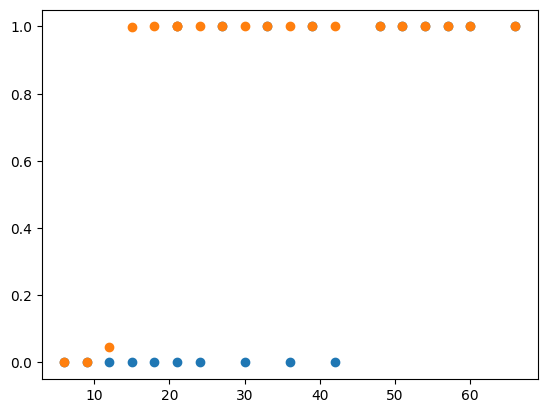

In [8]:
display(regr.coefs())
display(x_)
Y_Pred = regr.predict(x_)



plt.scatter(x, Y)
plt.scatter(x, Y_Pred)

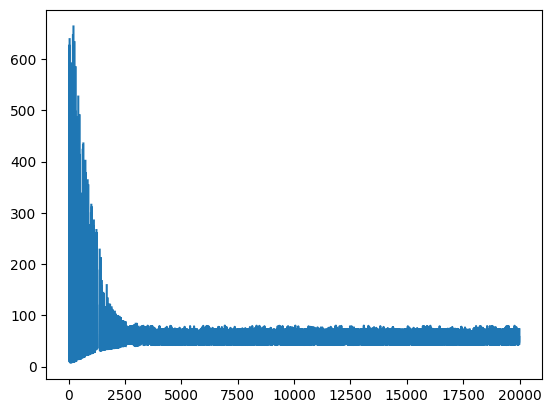

In [62]:
plt.plot(steps, errors)

Реализовать расчеты способами а и б для набора данных из файла insclass_train.csv/
Для 151 406 договоров страхования транспортных средств известны значения ряда признаков, в том числе пол, возраст, стаж вождения и коэффициент бонус-малус водителя, тип, марка, модель, год выпуска, страна – производитель, мощность и объем двигателя, а также признак target, равный 1, если заключение договора с клиентом является рисковым, и 0 в противном случае (файл insclass_train.csv).

Требуется построить модель, предсказывающую значение признака target для 22 624 договоров из тестового набора данных (файл insclass_test.csv).

В обучающем наборе данных для каждого договора известны следующие поля:

variable_1 - агрегированный коэффициент бонус-малус (повышающий или понижающий стоимость полиса в зависимости от аварийности в предыдущие периоды);
variable_2 - индикатор расторжения договора по инициативе страхователя (клиента);
variable_3 - индикатор расторжения договора по инициативе страховщика (страховой компании);
variable_4 - идентификатор года выпуска транспортного средства;
variable_5 - идентификатор страны - производителя транспортного средства;
variable_6 - мощность двигателя в лошадиных силах;
variable_7 - объем двигателя в куб. см;
variable_8 - идентификатор стороны расположения руля (левый или правый);
variable_9 - пробег транспортного средства, покрываемый гарантией производителя;
variable_10 - индикатор действия гарантии на транспортное средство;
variable_11 - "мультидрайв" - индикатор допуска к управлению транспортным средством более одного водителя;
variable_12 - возраст транспортного средства (в мес.);
variable_13 - возраст водителя с максимальным стажем;
variable_14 - коэффициент возраст-стаж;
variable_15 - коэффициент краткосрочности;
variable_16 - коэффициент мощности;
variable_17 - коэффициент "мультидрайв";
variable_18 - территориальный коэффициент;
variable_19 - коэффициент "КНДР";
variable_20 - идентификатор канала продаж;
variable_21 - марка транспортного средства;
variable_22 - модель транспортного средства;
variable_23 - индикатор отечественных транспортных средств;
variable_24 - пол водителя с максимальным коэффициентом "возраст-стаж";
variable_25 - индикатор пролонгации;
variable_26 - индикатор совпадения собственника транспортного средства и водителя;
variable_27 - стаж водителя с максимальным коэффициентом "возраст-стаж";
variable_28 - тип транспортного средства;
target - класс риска, равный 1, если заключение договора с клиентом является рисковым, и 0 в противном случае.